Enter values to predict a PCI


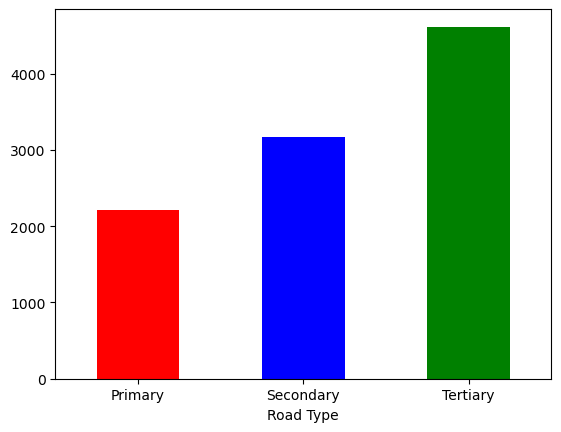

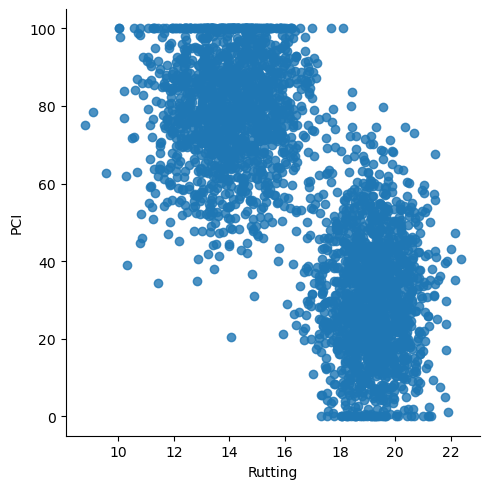

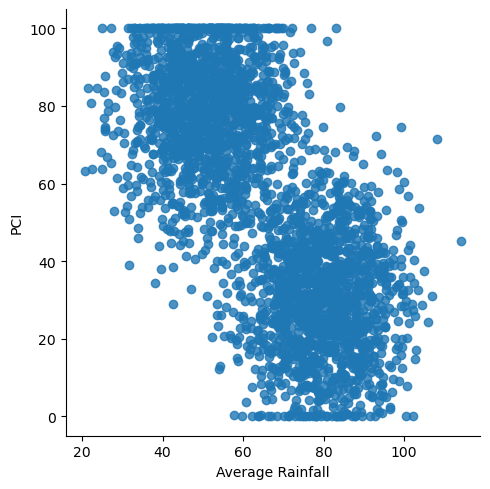

This model has an r2 score of 0.6132453007246621


In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn


import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv('Pavement_Dataset.csv')

graph_df = df.iloc[7000:]

X = df.drop(columns=['PCI','Road Type', 'Asphalt Type', 'Last Maintenance', 'IRI'])
y = df[['PCI']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

types = df.groupby(by='Road Type').size()

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

traffic_widget = widgets.BoundedFloatText(description='Avg Traffic:', value='0', min=0, max=10000.0)
rainfall_widget = widgets.BoundedFloatText(description='Avg Rainfall:', value='0', min=0, max=50.0)
rutting_widget = widgets.BoundedFloatText(description='Rutting:', value='0', min=0, max=30.0)

button_predict = widgets.Button( description='Predict' )
button_output = widgets.Label(value='0' )

widget_box=widgets.VBox([traffic_widget, rainfall_widget, rutting_widget, button_predict, button_output])

def on_click_predict(b):
    prediction = linear_regression_model.predict(pd.DataFrame(np.array([[
        traffic_widget.value, rainfall_widget.value, rutting_widget.value]]), columns=X.columns))
    if prediction[0] < 0:
        prediction[0] = 0
    if prediction[0] > 100:
        prediction[0] = 100
    button_output.value='Prediction of PCI = '+ str(prediction[0])
button_predict.on_click(on_click_predict)


print('\033[1m' + 'Enter values to predict a PCI' + '\033[0m')
display(widget_box)

y_predict = linear_regression_model.predict(X_test)

plot = types.plot.bar(color=['red','blue','green'],rot=0)
sns.lmplot(x='Rutting', y='PCI', data=graph_df, fit_reg=False)
sns.lmplot(x='Average Rainfall', y='PCI', data=graph_df, fit_reg=False)

plt.show()


test = r2_score(y_test, y_predict)
print('This model has an r2 score of ' + str(test))